In [2]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
from numpy.linalg import norm
import pickle
import matplotlib.pyplot as plt

In [ ]:
emb_dim = 200
PATH = f'datasets/glove.6B/glove.6B.{emb_dim}d.txt'
PATH_PKL = f'datasets/glove.6B/glove.6B.{emb_dim}d.pkl'

In [11]:
word_vectors = {}
def create_emb_dictionary(path):
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = [float(x) for x in values[1:]]
            word_vectors[word] = vector

create_emb_dictionary(PATH)

In [16]:
for idx, (word, values) in enumerate(word_vectors.items()):
    print(f'{word} => {values[:10]}...')
    if idx == 10:
        break



the => [-0.071549, 0.093459, 0.023738, -0.090339, 0.056123, 0.32547, -0.39796, -0.092139, 0.061181, -0.1895]...
, => [0.17651, 0.29208, -0.0020768, -0.37523, 0.0049139, 0.23979, -0.28893, -0.014643, -0.10993, 0.15592]...
. => [0.12289, 0.58037, -0.069635, -0.50288, 0.10503, 0.39945, -0.38635, -0.084279, 0.12219, 0.080312]...
of => [0.052924, 0.25427, 0.31353, -0.35613, 0.029629, 0.51034, -0.10716, 0.15195, 0.057698, 0.06149]...
to => [0.57346, 0.5417, -0.23477, -0.3624, 0.4037, 0.11386, -0.44933, -0.30991, -0.0053411, 0.58426]...
and => [0.20327, 0.47348, 0.050877, 0.002103, 0.060547, 0.33066, 0.048486, 0.021504, -0.53631, 0.21312]...
in => [-0.10272, 0.3041, -0.13577, -0.27979, -0.40926, -0.26553, 0.10492, -0.044101, 0.062731, -0.0416]...
a => [0.24169, -0.34534, -0.22307, -1.2907, 0.25285, -0.55128, -0.080336, -0.0081767, 0.31136, -0.45101]...
" => [0.0010318, 0.31201, -0.59768, -0.12583, -0.27524, 0.29145, -0.30431, 0.037122, 0.94468, 0.088085]...
's => [-0.0059614, 0.45148, 0.00454

## Plot some embeddings

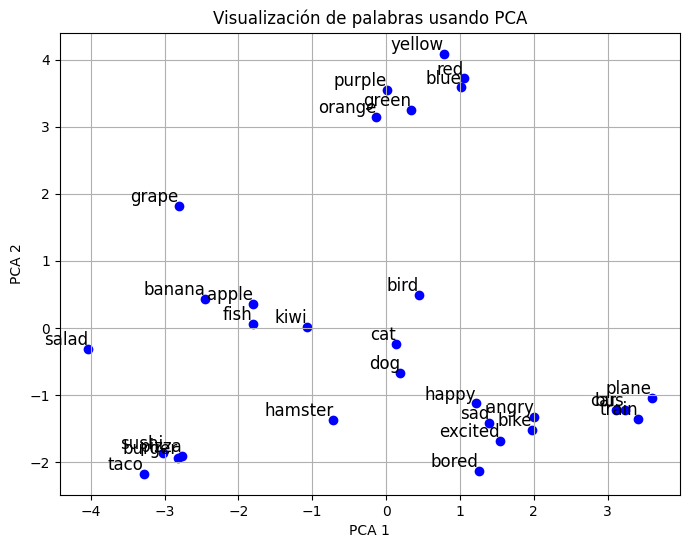

In [22]:
def plot_words_pca(word_vectors, word_list):
    """
    Reduce la dimensionalidad de los embeddings a 2D con PCA y los grafica.

    Parámetros:
    - word_vectors: Diccionario con palabras como claves y sus embeddings como valores.
    - word_list: Lista de palabras a visualizar.
    """
    # Filtrar solo las palabras que existen en el diccionario
    filtered_words = [word for word in word_list if word in word_vectors]
    if not filtered_words:
        print("Ninguna palabra de la lista está en los embeddings.")
        return

    # Obtener los vectores de las palabras seleccionadas
    vectors = np.array([word_vectors[word] for word in filtered_words])

    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(vectors)

    # Graficar los puntos
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], color='blue')

    # Etiquetar cada punto con su palabra
    for word, (x, y) in zip(filtered_words, reduced_vectors):
        plt.text(x, y, word, fontsize=12, ha='right', va='bottom')

    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.title("Visualización de palabras usando PCA")
    plt.grid()
    plt.show()



# Example usage

words = [
    'burger', 'pizza', 'sushi', 'taco', 'salad',
    'car', 'bike', 'bus', 'train', 'plane',
    'happy', 'sad', 'angry', 'excited', 'bored',
    'dog', 'cat', 'fish', 'bird', 'hamster',
    'apple', 'banana', 'orange', 'grape', 'kiwi',
    'red', 'blue', 'green', 'yellow', 'purple'

]

plot_words_pca(word_vectors, words)

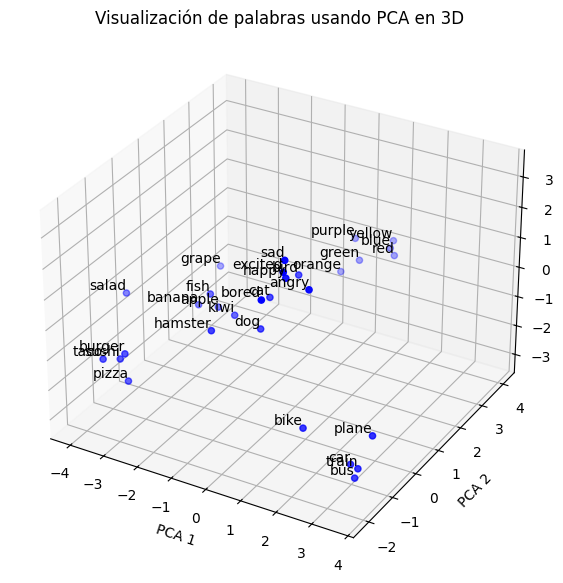

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_words_pca_3d(word_vectors, word_list):
    """
    Reduce la dimensionalidad de los embeddings a 3D con PCA y los grafica en 3D.

    Parámetros:
    - word_vectors: Diccionario con palabras como claves y sus embeddings como valores.
    - word_list: Lista de palabras a visualizar.
    """
    # Filtrar solo las palabras que existen en el diccionario
    filtered_words = [word for word in word_list if word in word_vectors]
    if not filtered_words:
        print("Ninguna palabra de la lista está en los embeddings.")
        return

    # Obtener los vectores de las palabras seleccionadas
    vectors = np.array([word_vectors[word] for word in filtered_words])

    # Aplicar PCA para reducir a 3 dimensiones
    pca = PCA(n_components=3)
    reduced_vectors = pca.fit_transform(vectors)

    # Crear la figura 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Graficar los puntos
    ax.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], color='blue')

    # Etiquetar cada punto con su palabra
    for word, (x, y, z) in zip(filtered_words, reduced_vectors):
        ax.text(x, y, z, word, fontsize=10, ha='right', va='bottom')

    # Etiquetas de los ejes
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    ax.set_zlabel("PCA 3")
    ax.set_title("Visualización de palabras usando PCA en 3D")

    plt.show()

# Lista de palabras a visualizar
words = [
    'burger', 'pizza', 'sushi', 'taco', 'salad',
    'car', 'bike', 'bus', 'train', 'plane',
    'happy', 'sad', 'angry', 'excited', 'bored',
    'dog', 'cat', 'fish', 'bird', 'hamster',
    'apple', 'banana', 'orange', 'grape', 'kiwi',
    'red', 'blue', 'green', 'yellow', 'purple'
]

# Llamar a la función
plot_words_pca_3d(word_vectors, words)
